# IQ modulation for Chirp

In [118]:
%matplotlib inline
% run ./chirp.py

In [119]:
# Chirp bandwidth in Hz
BW = 2000

# Carrier in Hz
CARRIER=17000

In [120]:
F0 = -BW/2
F1 = +BW/2
T = TIME_FRAME

In [121]:
def carrier_IQ(iq, f=CARRIER, phase=0.0):
    t = linspace(0, T, int(T * Fs))
    if iq == 'I':
        return cos(2 * pi * f * t + phase)
    elif iq == 'Q':
        return sin(2 * pi * f * t + phase)
    
def chirp_x_carrier(f0=F0, f1=F1, updown="up"):
    t = linspace(0, T, int(T * Fs))
    k = float(f1-f0)/float(T)
    if (updown == "up"):
        f = f0 + k * t / 2.0
    elif (updown == "down"):
        f = f1 - k * t / 2.0
    arg = 2 * pi * (CARRIER - f) * t
    return cos(arg) * AMPLITUDE

## Carrier

In [122]:
Ci = carrier_IQ('I')
Cq = carrier_IQ('Q')

Frequencies at peaks: [-17029.09090909  17029.09090909] Hz


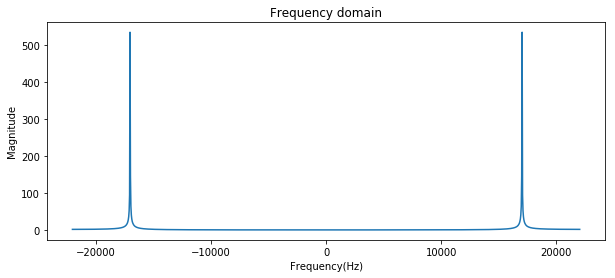

In [123]:
plot_fft(Ci)

Frequencies at peaks: [-17029.09090909  17029.09090909] Hz


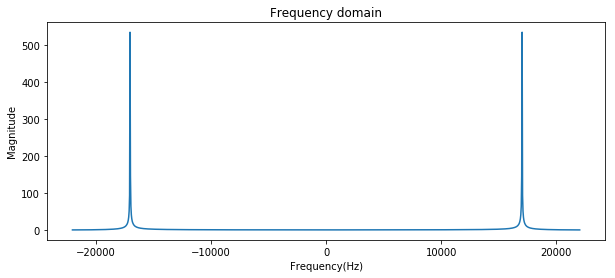

In [124]:
plot_fft(Cq)

## Baseband signal

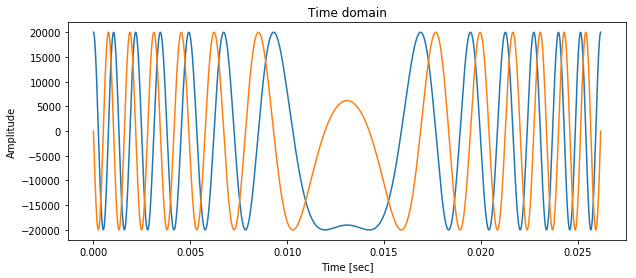

In [125]:
# Up chipr
plot_wave(chirp(f0=F0, f1=F1, phase=0), real_only=False)

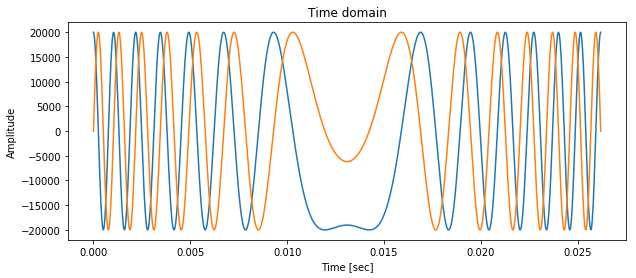

In [126]:
# Down chirp
plot_wave(chirp(f0=F0, f1=F1, phase=0).conjugate(), real_only=False)

## I/Q modulation 

In [127]:
WW = chirp_x_carrier(f0=F0, f1=F1)
WWd = chirp_x_carrier(f0=F0, f1=F1, updown="down")

Frequencies at peaks: [-17792.72727273 -16265.45454545  16265.45454545  17792.72727273] Hz


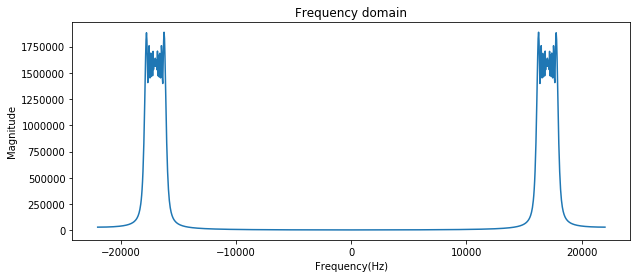

In [128]:
plot_fft(WW)

## I/Q demodulation

In [129]:
Ri = WW*carrier_IQ('I', phase=0.0)
Rq = WW*carrier_IQ('Q', phase=0.0)
Rid = WWd*carrier_IQ('I', phase=0.0)
Rqd = WWd*carrier_IQ('Q', phase=0.0)

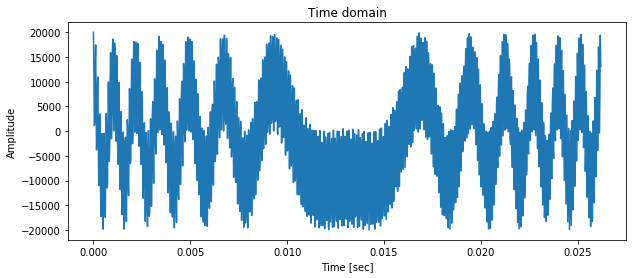

In [130]:
plot_wave(Ri)

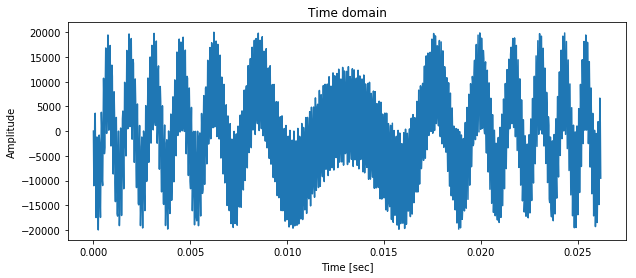

In [131]:
plot_wave(Rq)

Frequencies at peaks: [-687.27272727 -496.36363636 -305.45454545 -114.54545455  114.54545455
  305.45454545  496.36363636  687.27272727] Hz


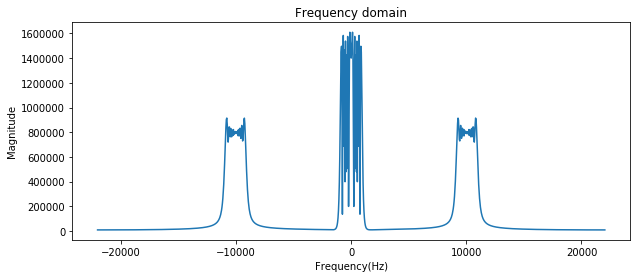

In [132]:
plot_fft(Ri)

Frequencies at peaks: [-763.63636364  763.63636364] Hz


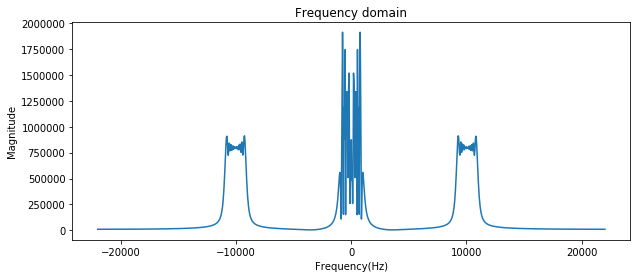

In [133]:
plot_fft(Rq)

## Low-pass filter to remove 2 * carrier frequency terms

In [134]:
# LPF
CUTOFF = 3000
R = lpf(Ri, CUTOFF) + 1j*lpf(Rq, CUTOFF)
Rd = lpf(Rid, CUTOFF) + 1j*lpf(Rqd, CUTOFF)

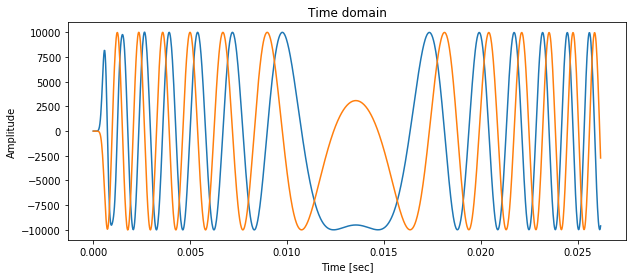

In [135]:
plot_wave(R, real_only=False)

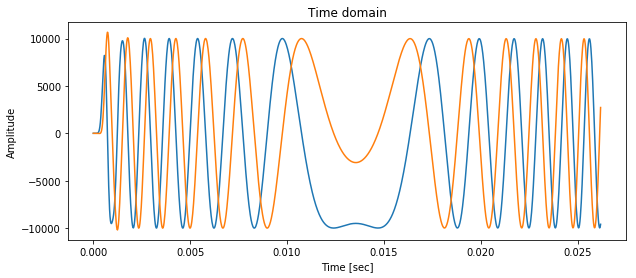

In [136]:
plot_wave(Rd, real_only=False)

Frequencies at peaks: [-763.63636364  725.45454545] Hz


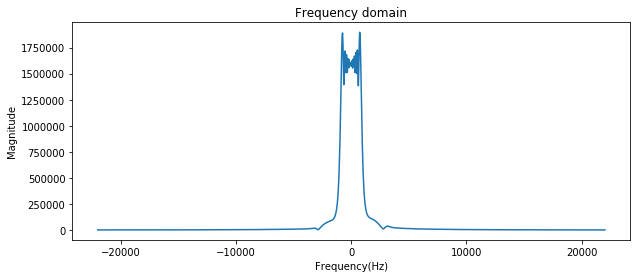

In [137]:
plot_fft(R)

Frequencies at peaks: [-725.45454545  763.63636364] Hz


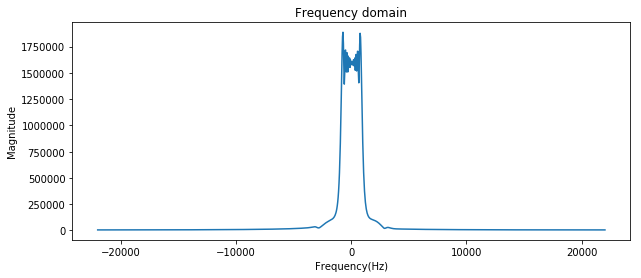

In [138]:
plot_fft(Rd)

## Analyzing baseband signal

Frequencies at peaks: [-1641.81818182  1641.81818182] Hz


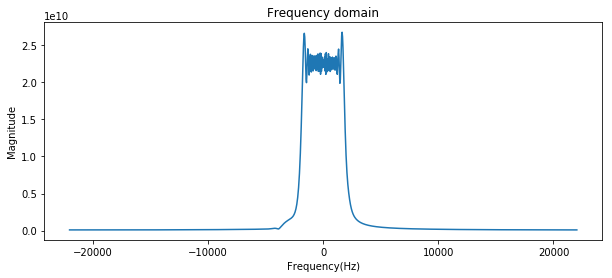

In [139]:
# Up-chirp detection fails
plot_fft(R*chirp(f0=F0, f1=F1), logscale=False)

Frequencies at peaks: [-38.18181818] Hz


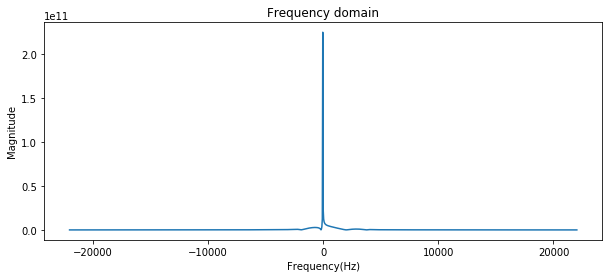

In [140]:
# Up-chirp detection suceeds
plot_fft(R*chirp(f0=F0, f1=F1).conjugate(), logscale=False)

Frequencies at peaks: [38.18181818] Hz


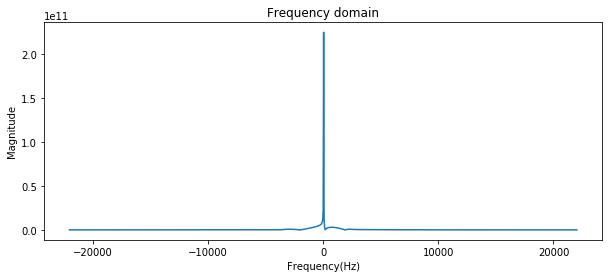

In [141]:
# Down-chirp detection suceeds
plot_fft(Rd*chirp(f0=F0, f1=F1), logscale=False)

Frequencies at peaks: [-1641.81818182  1641.81818182] Hz


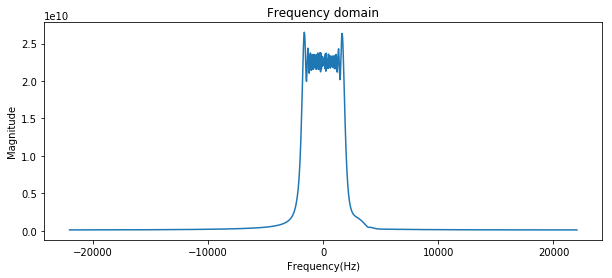

In [142]:
# Down-chirp detection fails
plot_fft(Rd*chirp(f0=F0, f1=F1).conjugate(), logscale=False)